# Cyclone Prediction and Analysis

### Importing packages 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import joblib
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### Reading the Dataset using Pandas and Manipulating them

In [20]:
file = pd.read_csv("cyclone prediction datas.csv")
file 

,Rainfall_mm,Duration_days,Humidity_percent,Sea_Surface_Temp_C,Wind_Speed_knots,Pressure_hPa,Cyclone
0,112,8,62,31.48,115,1015,0
1,280,5,49,29.64,23,974,1
2,116,4,83,23.40,21,1003,0
3,81,8,41,30.68,96,982,0
4,198,7,52,26.87,21,985,0
...,...,...,...,...,...,...,...
395,232,1,48,27.48,100,977,1
396,259,6,73,30.17,139,1007,1
397,156,2,92,26.52,29,992,0
398,105,8,83,28.44,19,990,0


In [21]:
print("======= Information of Dataset =======")
print(file.info())

======= Information of Dataset =======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rainfall_mm         400 non-null    int64  
 1   Duration_days       400 non-null    int64  
 2   Humidity_percent    400 non-null    int64  
 3   Sea_Surface_Temp_C  400 non-null    float64
 4   Wind_Speed_knots    400 non-null    int64  
 5   Pressure_hPa        400 non-null    int64  
 6   Cyclone             400 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 22.0 KB
None


In [22]:
print("======= Dataset Description =======")
print(file.describe())

======= Dataset Description =======
       Rainfall_mm  Duration_days  Humidity_percent  Sea_Surface_Temp_C  \
count   400.000000     400.000000        400.000000          400.000000   
mean    161.692500       4.845000         69.170000           27.114225   
std      82.227437       2.589931         17.175523            2.983203   
min      10.000000       1.000000         40.000000           22.060000   
25%     101.000000       3.000000         54.000000           24.412500   
50%     161.000000       5.000000         69.000000           27.395000   
75%     234.000000       7.000000         84.000000           29.725000   
max     299.000000       9.000000         99.000000           31.980000   

       Wind_Speed_knots  Pressure_hPa     Cyclone  
count        400.000000    400.000000  400.000000  
mean          76.485000    983.187500    0.277500  
std           40.342329     20.295989    0.690424  
min           10.000000    950.000000    0.000000  
25%           44.000000    9

In [23]:
print("======= Null Value =======")
print(file.isnull().sum())

======= Null Value =======
Rainfall_mm           0
Duration_days         0
Humidity_percent      0
Sea_Surface_Temp_C    0
Wind_Speed_knots      0
Pressure_hPa          0
Cyclone               0
dtype: int64


In [24]:
data = file.dropna()
data

,Rainfall_mm,Duration_days,Humidity_percent,Sea_Surface_Temp_C,Wind_Speed_knots,Pressure_hPa,Cyclone
0,112,8,62,31.48,115,1015,0
1,280,5,49,29.64,23,974,1
2,116,4,83,23.40,21,1003,0
3,81,8,41,30.68,96,982,0
4,198,7,52,26.87,21,985,0
...,...,...,...,...,...,...,...
395,232,1,48,27.48,100,977,1
396,259,6,73,30.17,139,1007,1
397,156,2,92,26.52,29,992,0
398,105,8,83,28.44,19,990,0


In [25]:
# No. of Row and columns
file.shape

(400, 7)

In [26]:
# names of columns
file.columns

Index(['Rainfall_mm', 'Duration_days', 'Humidity_percent',
       'Sea_Surface_Temp_C', 'Wind_Speed_knots', 'Pressure_hPa', 'Cyclone'],
      dtype='object')

_________________________________________________________
30% (Week: 1)
_________________________________________________________



### Univiated Analysis

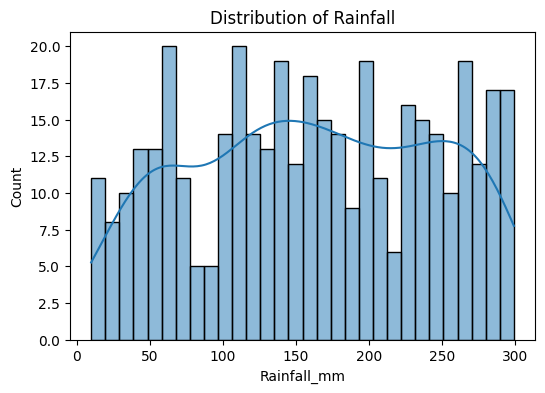

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(file['Rainfall_mm'], kde=True, bins=30)
plt.title("Distribution of Rainfall")
plt.show()


### Using countplot() for Categorical Data

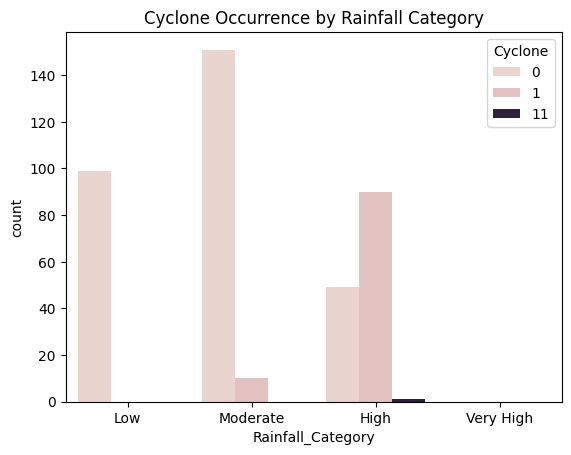

In [28]:
file['Rainfall_Category'] = pd.cut(file['Rainfall_mm'], bins=[0,100,200,300,400], 
                                   labels=['Low','Moderate','High','Very High'])

sns.countplot(x='Rainfall_Category', hue='Cyclone', data=file)
plt.title("Cyclone Occurrence by Rainfall Category")
plt.show()


In [29]:
file.columns

Index(['Rainfall_mm', 'Duration_days', 'Humidity_percent',
       'Sea_Surface_Temp_C', 'Wind_Speed_knots', 'Pressure_hPa', 'Cyclone',
       'Rainfall_Category'],
      dtype='object')

### Using Histograms to plot all the columns in Dataset

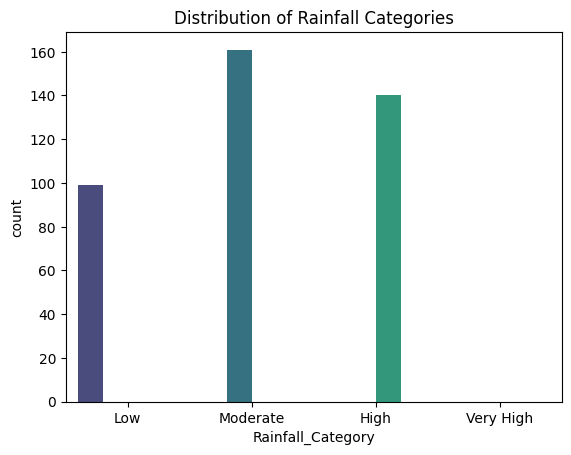

In [30]:
sns.countplot(x='Rainfall_Category', hue='Rainfall_Category', 
              data=file, palette='viridis', legend=False)
plt.title("Distribution of Rainfall Categories")
plt.show()


### Correlation Matrix for numerical features

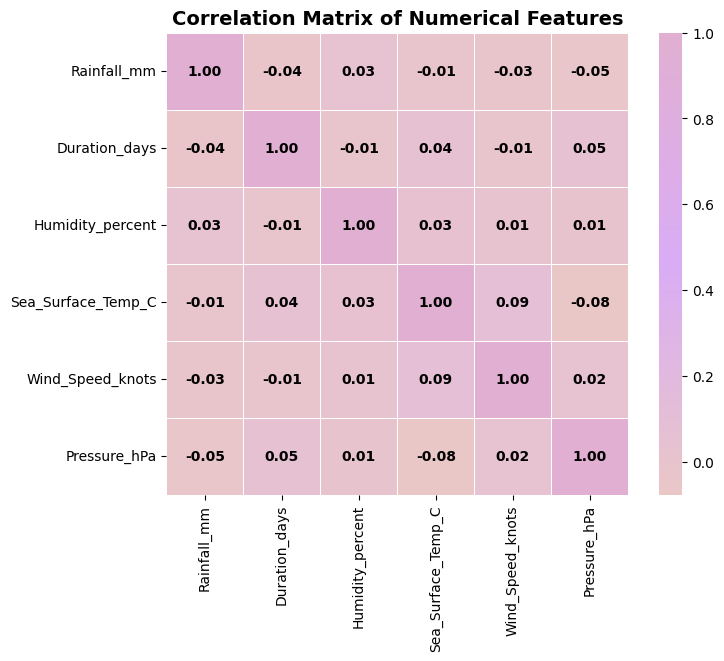

In [31]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Rainfall_mm', 'Duration_days', 'Humidity_percent', 
            'Sea_Surface_Temp_C', 'Wind_Speed_knots', 'Pressure_hPa']

corr_matrix = file[num_cols].corr()

# Define pastel purple + peach pink colormap
pastel_cmap = mcolors.LinearSegmentedColormap.from_list(
    "pastel_purple_peach",
    ["#EAC7C7", "#D9ACF5", "#E1AFD1"]  # peach pink, pastel purple, lavender
)

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap=pastel_cmap, 
    cbar=True, 
    square=True,
    annot_kws={"size":10, "weight":"bold", "color":"black"},
    linewidths=0.5, linecolor="white"  # soft gridlines
)
plt.title("Correlation Matrix of Numerical Features", fontsize=14, fontweight="bold")
plt.show()


### Pairplot for the dataset

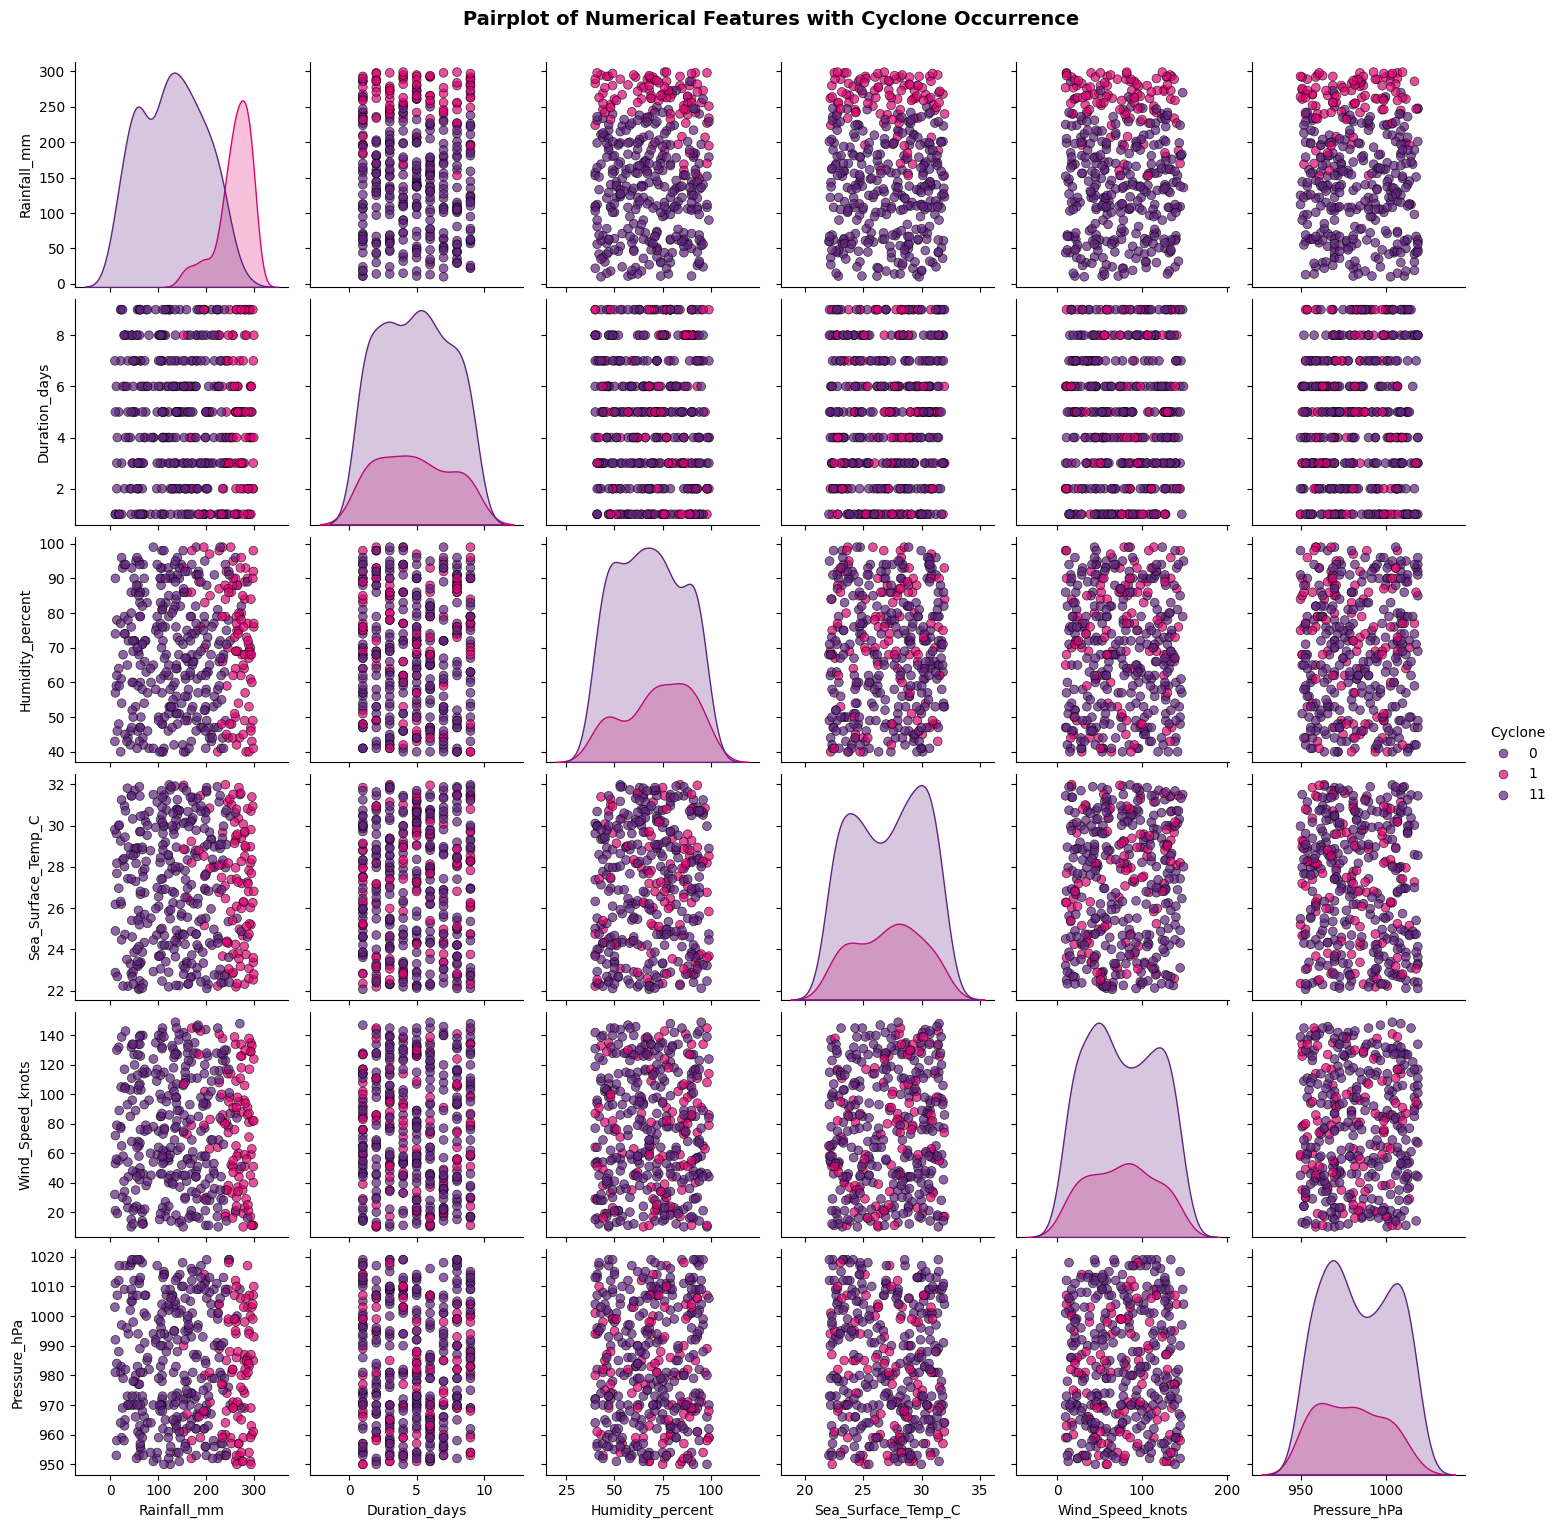

In [32]:
num_cols = ['Rainfall_mm', 'Duration_days', 'Humidity_percent',
            'Sea_Surface_Temp_C', 'Wind_Speed_knots', 'Pressure_hPa']

pink_palette = ["#60237E", "#DC0473"]

sns.pairplot(
    file[num_cols + ['Cyclone']], 
    vars=num_cols,
    hue='Cyclone',
    palette=pink_palette,
    diag_kind="kde",
    plot_kws={'alpha':0.7, 's':40, 'edgecolor':'k'}
)

plt.suptitle("Pairplot of Numerical Features with Cyclone Occurrence", 
             fontsize=14, fontweight="bold", y=1.02)
plt.show()

### Data Preprocessing Cyclone Occurrence Dataset


In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
file = pd.read_csv("cyclone prediction datas.csv")

# Check for missing values
file = file.dropna()

# Define features (X) and target (y)
X = file.drop('Cyclone', axis=1)   # predictors
y = file['Cyclone']                # target

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("✅ Preprocessing complete! Train and test sets are ready.")


✅ Preprocessing complete! Train and test sets are ready.


### Feature Selection: 
Data Splitting into
- Train 
- Test

In [34]:
X = file[["Duration_days", "Rainfall_mm", "Wind_Speed_knots", "Humidity_percent", "Sea_Surface_Temp_C", "Pressure_hPa"]]
Y = file["Cyclone"]

file.columns

Index(['Rainfall_mm', 'Duration_days', 'Humidity_percent',
       'Sea_Surface_Temp_C', 'Wind_Speed_knots', 'Pressure_hPa', 'Cyclone'],
      dtype='object')

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

### Test and Train Data shape:

In [36]:
X_train.shape

(280, 6)

In [37]:
X_test.shape

(120, 6)

In [38]:
Y_train.shape

(280,)

In [39]:
Y_test.shape

(120,)

In [40]:
X_train

,Duration_days,Rainfall_mm,Wind_Speed_knots,Humidity_percent,Sea_Surface_Temp_C,Pressure_hPa
114,3,240,35,49,27.96,1008
25,8,280,106,89,28.51,969
99,6,266,37,69,23.81,966
90,1,71,114,90,30.49,1001
271,8,108,131,40,25.01,1004
...,...,...,...,...,...,...
132,5,37,54,44,22.21,970
289,2,67,20,58,28.83,968
109,4,240,123,94,30.62,1009
395,1,232,100,48,27.48,977


In [41]:
X_test

,Duration_days,Rainfall_mm,Wind_Speed_knots,Humidity_percent,Sea_Surface_Temp_C,Pressure_hPa
146,6,146,64,82,26.18,959
332,2,14,79,62,28.17,984
67,3,261,134,90,29.28,951
362,3,98,117,94,26.99,1017
102,1,264,58,75,22.34,950
...,...,...,...,...,...,...
355,7,10,32,43,29.80,1003
244,4,42,103,46,23.29,1002
217,2,156,30,49,28.83,978
168,3,63,22,86,26.67,981


In [42]:
Y_train

114    0
25     1
99     1
90     0
271    0
      ..
132    0
289    0
109    0
395    1
176    0
Name: Cyclone, Length: 280, dtype: int64

In [43]:
Y_test

146    0
332    0
67     1
362    0
102    1
      ..
355    0
244    0
217    0
168    0
74     0
Name: Cyclone, Length: 120, dtype: int64

_________________________________________________________
60% (Week:2)
_________________________________________________________


### Training the Data

In [44]:
# Step 4: Train model
X = data[['Rainfall_mm', 'Duration_days', 'Humidity_percent','Sea_Surface_Temp_C', 'Wind_Speed_knots', 'Pressure_hPa']]
Y = data['Cyclone']

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# Now you can predict with 6 features
user_data = [[200, 3, 90, 29, 120, 980]]
prediction = rf.predict(user_data)


### Checking Accuracy

In [45]:
Y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9166666666666666


### Taking User Input

In [46]:
rainfall = float(input("Enter rainfall (mm): "))
duration = float(input("Enter duration (days): "))
humidity = float(input("Enter humidity (%): "))
sea_surface_temp = float(input("Enter sea surface temperature (°C): "))
wind_speed = float(input("Enter wind speed (knots): "))
pressure = float(input("Enter atmospheric pressure (hPa): "))

### Predicting Cyclone

In [47]:
user_data = [[rainfall, duration, humidity, sea_surface_temp, wind_speed, pressure]]
user_data_scaled = scaler.transform(user_data)
prediction = rf.predict(user_data_scaled)

if prediction[0] == 1:
    print("⚠️ Cyclone predicted in this area!")
else:
    print("✅ No Cyclone predicted.")

✅ No Cyclone predicted.


_________________________________________________________
100% (Week:3)
_________________________________________________________
